In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./datasets/hitters.csv')

In [3]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
data.shape

(322, 20)

In [5]:
data.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [6]:
(data['League'] == data['NewLeague']).sum()

303

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
x = data.drop(['League', 'Division', 'Salary', 'NewLeague'], axis=1)

In [10]:
x.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


In [11]:
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [12]:
x_scaled

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,-0.574071,-0.755130,-1.123591,-0.804734,-0.728308,-1.145172,-1.310194,-1.015121,-0.997117,-0.795183,-0.985636,-0.905069,-0.923478,0.560399,-0.540924,1.880899
1,-0.430437,-0.431732,-0.433579,-1.035649,-0.383827,0.011930,1.332925,0.344876,0.179704,-0.005697,-0.113299,0.252124,0.430391,1.224048,-0.467740,0.308192
2,0.640293,0.624699,0.831443,0.580752,0.917547,1.724442,-0.903560,-0.441561,-0.398759,-0.075357,-0.404078,-0.192719,0.010354,2.108915,-0.182323,0.937275
3,0.751283,0.861858,1.061447,0.542266,1.147201,-0.080638,0.722974,1.283860,1.312145,1.805477,1.406546,1.526538,0.351634,-0.317331,-0.701928,-0.792703
4,-0.391264,-0.302373,-0.088573,-0.458363,-0.230724,-0.404626,-1.106877,-0.970736,-0.943555,-0.667472,-0.931677,-0.853972,-0.852222,1.841314,-0.489695,-0.635432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.757812,0.560020,-0.433579,0.542266,-0.001070,-0.080638,-0.496927,0.023406,0.135325,-0.435270,0.060569,-0.057463,-0.458437,0.128670,-0.716565,-0.792703
318,0.725167,0.754058,-0.663583,0.965609,0.075482,2.557555,0.926291,1.233441,1.214204,-0.353999,1.613389,0.363334,2.305557,0.085854,2.005873,1.880899
319,0.614177,0.538460,-0.893587,0.388323,-0.192448,0.613623,-0.293610,-0.408811,-0.435487,-0.725522,-0.425062,-0.712704,-0.428435,-0.898917,0.044547,-0.163620
320,1.254003,0.926537,-0.203575,1.311981,0.458239,1.817010,0.113024,0.236714,0.213371,0.319386,0.333362,0.270158,0.269127,3.657430,0.176278,0.622733


Create as many principal components as needed to explain 95% of original data's variance.

In [13]:
pca = PCA(0.95)

In [14]:
pca.fit(x_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.explained_variance_ratio_

array([0.46037855, 0.26039849, 0.1033886 , 0.05369021, 0.04207841,
       0.02963591, 0.01570791])

In [16]:
np.sum(pca.explained_variance_ratio_)

0.9652780888388013

In [17]:
x_pca = pca.transform(x_scaled)

In [18]:
print(x_scaled.shape)
print(x_pca.shape)

(322, 16)
(322, 7)


In [19]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

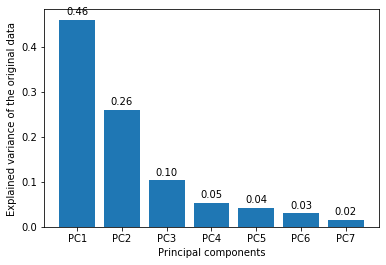

In [20]:
fig, ax = plt.subplots()
rects = plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal components')
plt.ylabel('Explained variance of the original data')
plt.xticks(ticks=range(0, len(pca.explained_variance_ratio_)),
                       labels=['PC{}'.format(x) for x in range(1, len(pca.explained_variance_ratio_) + 1)])
autolabel(rects)
plt.show()

In [21]:
x_pca = pd.DataFrame(data=x_pca,
                     columns=['PC{}'.format(x) for x in range(1, len(pca.explained_variance_ratio_) + 1)],
                     index=data.index)

In [22]:
x = x_pca.merge(pd.get_dummies(data['League'], drop_first=True), left_index=True, right_index=True)

In [23]:
x = x.merge(pd.get_dummies(data['Division'], drop_first=True), left_index=True, right_index=True)

In [24]:
x.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,N,W
0,-3.240106,-0.253173,0.776066,1.219268,0.727847,-0.049711,-1.454681,0,0
1,0.245488,1.302951,0.118040,1.591864,-0.102789,-0.072754,-0.321704,1,1
2,0.603883,-2.617002,-0.698183,1.752523,-0.267457,-1.094465,-0.425861,0,1
3,3.591276,0.547821,-1.049022,-0.756069,0.780899,0.791621,0.109723,1,0
4,-2.264528,-0.698898,-1.290536,1.718851,-0.145780,0.196242,0.397752,1,0


In [25]:
y = pd.get_dummies(data['NewLeague'], drop_first=True)

In [26]:
y.head()

,N
0,0
1,1
2,0
3,1
4,1


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [29]:
dt = DecisionTreeClassifier(min_samples_split=10)

In [30]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
y_predicted = dt.predict(x_test)

In [32]:
confusion_matrix(y_test, y_predicted)

array([[38,  1],
       [11, 31]], dtype=int64)

In [33]:
accuracy_score(y_test, y_predicted)

0.8518518518518519

In [34]:
pd.DataFrame(np.round(dt.feature_importances_, 3), index=x.columns, columns=['Feature Importance'])

,Feature Importance
PC1,0.032
PC2,0.034
PC3,0.000
PC4,0.042
PC5,0.002
PC6,0.015
PC7,0.059
N,0.817
W,0.000


In [35]:
rf = RandomForestClassifier(n_estimators=5000, min_samples_split=10)

In [36]:
rf.fit(x_train, y_train.values.flatten())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
y_predicted = rf.predict(x_test)

In [38]:
confusion_matrix(y_test, y_predicted)

array([[37,  2],
       [ 4, 38]], dtype=int64)

In [39]:
accuracy_score(y_test, y_predicted)

0.9259259259259259

In [40]:
pd.DataFrame(np.round(rf.feature_importances_, 3), index=x.columns, columns=['Feature Importance'])

,Feature Importance
PC1,0.046
PC2,0.041
PC3,0.035
PC4,0.056
PC5,0.054
PC6,0.041
PC7,0.033
N,0.693
W,0.002


In [41]:
gb = GradientBoostingClassifier(n_estimators=5000, min_samples_split=10)

In [42]:
gb.fit(x_train, y_train.values.flatten())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=5000,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [43]:
y_predicted = gb.predict(x_test)

In [44]:
confusion_matrix(y_test, y_predicted)

array([[37,  2],
       [ 6, 36]], dtype=int64)

In [45]:
accuracy_score(y_test, y_predicted)

0.9012345679012346

In [46]:
pd.DataFrame(np.round(gb.feature_importances_, 3), index=x.columns, columns=['Feature Importance'])

,Feature Importance
PC1,0.051
PC2,0.041
PC3,0.010
PC4,0.033
PC5,0.031
PC6,0.035
PC7,0.020
N,0.778
W,0.000
